In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pip install pgeocode

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pgeocode
nomi = pgeocode.Nominatim('IN')
import warnings
warnings.simplefilter('ignore')

In [5]:
Data_plantmaster = pd.read_excel("Plant Master.xlsx")
Data_JTD = pd.read_csv("cleaned_JTD.csv",low_memory = False)
Data_Customer = pd.read_excel("Customer_Data.xlsx")
Data_Finalinvoice = pd.read_csv("merged_final_invoice.csv",low_memory = False)

# Cleaning Customer Data

In [101]:
Data_Customer.columns

Index(['Customer No.', 'Partner Type', 'Data Origin', 'Title'], dtype='object')

In [102]:
Data_Customer.shape
# Data_Customer.drop('Business Partner',1,inplace=True)
Data_Customer['Title'].value_counts(dropna=False)
Data_Customer['Partner Type'].value_counts(dropna=False)
# Data_Customer['Data Origin'].value_counts(dropna=False)
# Data_Customer['Occupation'].value_counts(dropna=False)
# Data_Customer['Marital Status'].value_counts(dropna=False)
# Data_Customer.dropna(how='any',inplace=True)
Data_Customer.isnull().sum()

(509025, 4)

2.0    483931
1.0     25094
Name: Title, dtype: int64

1.0       508892
9001.0        39
9003.0        31
4.0           27
3.0           26
2.0            9
9002.0         1
Name: Partner Type, dtype: int64

Customer No.    0
Partner Type    0
Data Origin     0
Title           0
dtype: int64

In [116]:
# Data_Customer.dropna(how='any',inplace=True)
# Data_Customer.drop('Partner Type',1,inplace=True)
# Data_Customer.reset_index(inplace=True)
Data_Customer.drop(['level_0','index'],1,inplace=True)
Data_Customer

,Customer No.,Partner Type,Data Origin,Title
0,19,1.0,Z013,2.0
1,31,1.0,Z005,2.0
2,35,1.0,Z021,2.0
3,38,1.0,Z005,2.0
4,42,1.0,Z005,2.0
...,...,...,...,...
509020,E9798,1.0,Z001,2.0
509021,E9971,1.0,Z001,2.0
509022,EMA002,1.0,Z001,2.0
509023,EMA071,1.0,Z001,2.0


In [104]:
# Data_Customer.drop(columns=["Date of Birth","Death date","Marital Status"],inplace=True)
# Data_Customer.drop('Occupation',1,inplace=True)

In [105]:
Data_Customer['Customer No.'] = Data_Customer['Customer No.'].astype(str)

In [117]:
Data_Customer['Customer No.'][0]

'19'

# Cleaning Plant Master

In [44]:
Data_plantmaster.shape

(438, 13)

In [7]:
Data_plantmaster

,Plant,House number and street,Postal Code,City,Sales organization,State
0,BC07,"No.117 Poonamallee High Road,",600107,Chennai,MFCS,Tamil Nadu
1,BC30,"C-118, Phase 07,",160055,Mohali,MFCS,Punjab
2,X001,"Unit No.3, Kothari Compound,",400610,Thane,MFCA,Maharashtra
3,X002,"18/1, C Site 4, Sahibabad",201010,Ghaziabad,MFCA,Uttar Pradesh
4,X003,"#75, Sy.No. 83/2, Panathur Mai",560087,Bengaluru,MFCB,Karnataka
...,...,...,...,...,...,...
433,X780,"Jk Main Road,",462023,Bhopal,MFCD,Madhya Pradesh
434,X781,"149 Dhayal Street, Thiru Nagar",641030,Coimbatore,MFCD,Tamil Nadu
435,X789,"33,35, Rajiv Enclave Extension",243001,Barielly,MFCD,Uttar Pradesh
436,X795,"49&51/2, Thiru Vi Ka Industria",600032,Chennai,MFCA,Tamil Nadu


In [6]:
Data_plantmaster.drop('Vendor number plant',1,inplace=True)
# Data_plantmaster.dropna(how='any',inplace=True)
Data_plantmaster.drop(columns=["Factory calendar","Customer no. - plant","Valuation Area","PO Box","Name 2"],inplace=True)
Data_plantmaster.drop('Name 1',1,inplace=True)

In [75]:
Data_plantmaster['Sales organization'].value_counts()

MFCD    336
MFCC     55
MFCB     25
MFCA     12
Name: Sales organization, dtype: int64

# Cleaning JTD

In [8]:
Data_JTD.shape

(5619484, 10)

In [9]:
Data_JTD.drop('Unnamed: 0',1,inplace=True)
Data_JTD
# Data_JTD.info()

,Order Item,Material,Description,Item Category,Order Quantity,Target quantity UoM,Net value,descript_category
0,180,OSLCC_SRV31,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87,SUSPENSION
1,10,1DM279018170117,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13,OIL
2,40,1IS150203BE01,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92,FRONT
3,60,1DM279001990173,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14,ASSY
4,70,1DM88552790S001SA,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63,Overhaul
...,...,...,...,...,...,...,...,...
5567850,50,ACCT_SRV,DENTING RADIATOR MOUNTING PANEL LOWER,P001,850.0,MIN,1050.00,LOWER
5567851,60,ACCT_SRV,DENTING QUARTER PANEL RHS,P001,750.0,MIN,1250.00,PANEL
5567852,70,TOYOTA_SRV,CHARGING BATTERY & TESTING LOAD,P001,42.0,MIN,223.00,BATTERY
5567853,80,ACCT_SRV,REPAIR LHS / RHS TAIL LIGHT BOX,P001,450.0,MIN,450.00,AIR


In [100]:
Data_JTD.to_csv('Cleaned_JTD.csv')

In [66]:
# Data_JTD.drop('Labor Value Number',1,inplace=True)
# Data_JTD.dropna(how='any',inplace=True)
Data_JTD.drop('DBM Order',1,inplace=True)

In [126]:
Data_JTD['Item Category'].value_counts()

P002    3250293
P001    1845451
P011     343288
P010     128823
Name: Item Category, dtype: int64

In [60]:
desc_values = Data_JTD.Description.value_counts()
desc_values[desc_values>5]

MISC_OTHER CHARGES                270563
Paid Service-Minor                201857
WASHING                           199068
Wheel Alignment                   191211
OIL FILTER                        154387
                                   ...  
COVER ASSY-COWL TOP SIDE RH            6
HEAD LAMP ASSY LH (LHD)REFRESH         6
GRILLE RADIATOR(MOD)                   6
STRUT ASSY FR SUSP RH                  6
COVER A-WHEEL                          6
Name: Description, Length: 21982, dtype: int64

In [85]:
description_list = Data_JTD.Description.tolist()
description_words = []
for x in description_list: description_words += str(x).split(' ')
description_words

['MACHINING',
 'RR.SUSPENSION',
 'CHARGE',
 '',
 '(MAJOR)',
 'ASSY.OIL',
 'COOLER',
 '(6-PLATE)',
 '(VOR',
 'FRONT',
 'WHEEL',
 'BEARING/',
 'LUBRICATE',
 'ASSY.CYL.HEAD',
 'W',
 '/O',
 'INJ.(NA',
 'W',
 '/O',
 'Engine',
 'Overhaul',
 'Kit',
 '-Indica',
 'Di',
 'CYLINDER',
 'LINER',
 '824.72',
 'SY.CYL.HEAD',
 'COVER-PLAS',
 'MACHINING',
 'CYLINDER',
 'HEAD',
 '',
 '(DIESEL)',
 'MACHINING',
 'CYLINDER',
 'BLOCK',
 '',
 '(DIESEL)',
 'MISC_RECOVERABLE',
 'CHARGES',
 'ASSY.AUXILLIARY',
 'WATER',
 'TANK',
 '(EN',
 'GLOW',
 'PLUG',
 'KIT',
 'GEAR',
 'SHIFT',
 'LINKAGE',
 'BUSH',
 'KIT',
 '(',
 'WATER',
 'PUMP',
 'COOLANT',
 'TANK',
 'COOLANT',
 'CAP',
 'BOOT',
 'CLUTCH',
 'KIT',
 'CLUTCH',
 'RELEASE',
 'BRG',
 'VALVE',
 'AXLE',
 'REPAIR',
 'SKIMMING',
 'FLYWHEEL',
 'ANY',
 'HOSES',
 'PROFAR',
 'CONCENTRATED',
 'ANTIFREEZE',
 'COOLANT',
 'OIL',
 'FILTER',
 'OVERHAUL',
 'TURBOCHARGER',
 'RADIATOR',
 'ASSY',
 'OILSEALS/',
 'GASKETS',
 'AC',
 'HOSE',
 'SET',
 'AIR',
 'FILTER',
 'CLAMP',
 'A',
 

In [86]:
import re
desc_words=[]
for x in description_words:
    x = re.sub(r'[^\w\s]', '', x)
    x = x.strip()
    if len(x)>2: desc_words.append(x)
desc_words

['MACHINING',
 'RRSUSPENSION',
 'CHARGE',
 'MAJOR',
 'ASSYOIL',
 'COOLER',
 '6PLATE',
 'VOR',
 'FRONT',
 'WHEEL',
 'BEARING',
 'LUBRICATE',
 'ASSYCYLHEAD',
 'INJNA',
 'Engine',
 'Overhaul',
 'Kit',
 'Indica',
 'CYLINDER',
 'LINER',
 '82472',
 'SYCYLHEAD',
 'COVERPLAS',
 'MACHINING',
 'CYLINDER',
 'HEAD',
 'DIESEL',
 'MACHINING',
 'CYLINDER',
 'BLOCK',
 'DIESEL',
 'MISC_RECOVERABLE',
 'CHARGES',
 'ASSYAUXILLIARY',
 'WATER',
 'TANK',
 'GLOW',
 'PLUG',
 'KIT',
 'GEAR',
 'SHIFT',
 'LINKAGE',
 'BUSH',
 'KIT',
 'WATER',
 'PUMP',
 'COOLANT',
 'TANK',
 'COOLANT',
 'CAP',
 'BOOT',
 'CLUTCH',
 'KIT',
 'CLUTCH',
 'RELEASE',
 'BRG',
 'VALVE',
 'AXLE',
 'REPAIR',
 'SKIMMING',
 'FLYWHEEL',
 'ANY',
 'HOSES',
 'PROFAR',
 'CONCENTRATED',
 'ANTIFREEZE',
 'COOLANT',
 'OIL',
 'FILTER',
 'OVERHAUL',
 'TURBOCHARGER',
 'RADIATOR',
 'ASSY',
 'OILSEALS',
 'GASKETS',
 'HOSE',
 'SET',
 'AIR',
 'FILTER',
 'CLAMP',
 'DRAIN',
 'PLUG',
 'HOSEDISCHARGE',
 'CLAMP',
 'URANIA',
 'SUPREMO',
 '15W',
 '0039939',
 'HOSE',
 

In [87]:
unique_words = list(set(desc_words))
# unique_words.remove('')
len(unique_words)

23142

In [88]:
description_dict={x:0 for x in unique_words}

In [89]:
for x in desc_words: 
    description_dict[x]+=1  

In [90]:
description_dict

{'1ASA76115ELI99': 33,
 'WINT': 3,
 '72846301': 1,
 'SEALOIL56X722X78': 1,
 'SPLINE': 20,
 'M18X15X108X10': 11,
 'HYNI10': 87,
 'ASSY_TAILLAMP_RH_BOTTOM_W': 1,
 'SENINT': 1,
 '0112BG1450N': 2,
 'STOPPERDOOR': 1,
 'GRAPHICWINDY': 1,
 'ASYOTR': 10,
 'FLYWHEEL': 2851,
 'ARMGR': 3,
 'LHRR': 1,
 'SHAFT': 21610,
 'RHDOAK': 1,
 'SAFA': 7,
 'NEFASSYTHERMOSTAT': 1,
 'P43T10090W12V': 826,
 'Blade': 24813,
 '2ZEND': 2,
 '43T': 3,
 'SACL': 13,
 'IPLIPL': 1,
 'P8501402Slow': 51,
 '_SUMO': 4,
 'REB': 2,
 'ESCUTCHEONDR': 1,
 'WEIGHTASM60': 1,
 'COMDASH': 1,
 'HANDLEOUTER': 1,
 'RHMsLum': 1,
 'SATCHET': 12647,
 'SPD': 141,
 '62052RSRNC3': 5,
 'xing': 10,
 'COMPAL16X6JSX4': 1,
 'HSGMECH': 1,
 'DIACLCOVER': 8,
 'BRACKRT': 5,
 'LHRFSCORPIO': 44,
 'ALTOWAGAN': 4,
 'PSTGRACK': 2,
 'Automatic': 1,
 'ASTA': 3,
 'ZENLH': 1,
 'WSTRIPFR': 53,
 'BELLOWSTEERIN': 114,
 'NO1ALTO': 1,
 'WHL': 730,
 'DECORATION': 1,
 'PULLEYALTERNATOR': 1,
 'COMPOUT': 246,
 'MBRCOWL': 1,
 'LIDOUTER': 1,
 'VERNAFLUIDIC': 1,
 'LAMBADA'

In [92]:
description_series = pd.Series(description_dict)
sorted_desc_ser = description_series.sort_values(ascending=False)
sorted_desc_ser[sorted_desc_ser>20]

FILTER        435824
CHARGES       378352
OIL           373507
REPLACE       311276
WEIGHT        274826
               ...  
GEOMETRY          21
C0MBI             21
HEXFLBOLT         21
EMBLEMXING        21
ANTENA            21
Length: 6701, dtype: int64

In [93]:
for x in sorted_desc_ser[:6701].index:print(x) 

FILTER
CHARGES
OIL
REPLACE
WEIGHT
Wheel
MISC_OTHER
BALANCE
Paid
ASSY
BRAKE
ServiceMinor
WASHING
Alignment
LABOR
MISC
FRONT
HOURS
PROLEUM
MFC
REMOVE
SIDE
URANIA
SUPREMO
15W
BULB
AIR
15W40
REFIT
WHEEL
ONE
Wheels
WIPER
CI4SL
GRAM
PAD
BUMPER
REAR
BLADE
PAINTING
WASHER
Balancing
CLIP
DOOR
EACH
ENGINE
COOLANT
KIT
WATER
General
ANTIFREEZE
WINDSHIELD
Check
ServiceMajor
LIQUID
FUEL
Interior
Cleaning
DOT
Overhaul
BEARING
LAMP
025
CLUTCH
Brake
DISTILLED
Upholstery
ARM
BOLT
CYLINDER
Oil
ROD
TIE
ABSORBER
SHOCK
BOTH
GLASS
TUTELA
LOWER
STRUT
HOSE
HOUR
DISC
BUSH
OVERHAUL
HEAD
15GRAM
NEW
SET
RADIATOR
CLEANER
COVER
Engine
Petrol
JOINT
25GRAM
FENDER
FRT
ASSEMBLY
CALIPER
10GRAM
METALLIC
BELT
COOLANTGREEN
SCREEN
Ltr
PANEL
GAS
30GRAM
SEAL
SPRAY
ELEMENT
80W90
ROAD
Diesel
ASSISTANCE
MISC_ON
PLUG
FilterSpin
STEERING
Wiper
Blade
NUT
TRANSMISSIONS
DIESEL
PETROL
REPAIRING
BALL
GEAR
RUST
PER
GREASE
POWER
CONCENTRATED
PROFAR
DENTING
CLEANING
5W30
CARTRIDGE
SHAFT
CABLE
All
service
TYRE
Clutch
END
REPAIR
SHOE
12V
GAS

CROME
SAIL
MIDDLE
MICO
ASSYHUB
COMBIPACK
PROPORTIONING
GEARBO
SDRH
LOGANVERITO
KOMBIFILLER
TRB
RODCONN
SUPPT
Fiesta
MAST
GUSSET
RUBBERFR
FINISH
GALSS
XCENT
POWERGRIPBELT
SUPPORTLH
FRESH
EXT
R808
SSABS
Bezel
ALTOASTARWAGON
ZXI
SEALOILCRANKSHAFT
ASSYWIPERRR
CLIPDR
40X62X8
WELDED
MCPHERSON
LOC
P80
COMPRH
HONDACITY
FRESHNER
BELTVALVE
ASSYGREENGREEN
212
SENSORWATER
FUSE30
PIPED
ASSYQUARTER
OXYGEN
DIA35MM
NEFBALL
SETAXIAL
VIEWR
HEADLAMP_RH
CUTING
cont
BLRO
PJT
CRTG
30X62X16
YELLOW
HSCED
ASSYSPEED
CLUTH
GSKT
W408
TILT
JAN
RECOVERY
BOLTCONDSX4
PROJU
BELLOWSTEERIN
SCDC
BRAZING
RETAINERRR
ASMCLU
ROOTSCITEE
Medium
COVERBALAKING
GRIL
FRONTRH
BUSHCONTROL
LINNING
ASSYRHS
SPREY
DIACLUTCH
STREEING
140
BUSHSPRING
STOPER
ASMWPARK
MSSIGMA
CONNECTIONNEFTC
DKMAX
ABP
PANELRR
30A
WINDSHIED
DRIPRAIL
3PK780
DIVISION
GENERAL
SOLDERING
Driven
PET
SETDISC
ACCENTVERNA
BJOINT
Q922M
REGULUNIT
OUTINNER
Overflow
BREAK
Saver
DieselPAIR
CATCH
WAIPER
THREAD
SPEEDO
FACE
COMPOILF8DALTO
SETHEATER
ENGINETECH
Chain
RHALTO
COM

LP1173
LINKSTABILIZER
Sensor
PANMDI3200
NAX
PIANO
ASSYACCELRH
JTS
BUSH2
GASKETINSULATING
ASYOUTR
xNR
13L
65J
10556721SCREW
ELEMNT
REDIO
METZEL
BELLOWÃÂ
GRE
COVERTHERMOSTAT
WPL
TA65
PRI
HINGELH
TYPEIIIMFR
FRRH
AVX13925
STRUTFRT
INDICALINEA
LCAZENALTO
MIRRORAN
SHIMWHEELBRG0075
MOUNTA
STEEING
REARLH
L750
46544820
ASSY_TAILLAMP_RH_BOTTOM_WITHOU
1BM0401EA0360N
STIBLIZER
GROO
DIFFETIAL
FILTERNEW
AMZE
DISC4X2VENTILATED
KITINDICA
G793X4764MM
BAL45GM
SCORPIOEAGLE
IPER
THD
Omni
ASSYCNGLPG
COVERFACEMOUNT
G635MM
AHEAD
KBXWC
ASSYTRAILING
GROVE
deflector
AINSIDE
DRRH
HATCHBACK
ATTACH
BOXLATCHASSY
MDI3200
VALVEPAD
EVAPORATIVE
1210PE
ROOTSMELODY
MAXXPICKUP
SEALCAMSHAFTFRONT
RUBBERCLTCHACCLRTRBRKE
GRILLERADIATORUNPAINTEDZEN
BRACKETMUSTANG
SHIMR
PPG200GM
NONASBRD6173
PARTY
WIR
650
LOWERARM
BRACKETSTABILIZERL
ASSY_TAILLAMP_LH_BOTTOM_WITHOU
COMPR
LUK
INDICAD
SETP0041PAQ07
SPEEDOMET
BEARINGORDER0019406
ACTIVE
RINGD24ID108
38X1
MTGRR
EVPR
CABLECONT
ASSYEGR
1APA7MFSULA0080
GDE7833
SPECIALWASHERBUTTERFLYWINDO

In [95]:
morethan_20 = Data_JTD.Description.apply(lambda x: categorize(str(x)))

In [94]:
def categorize(x):
    count=0
    category = None
    for i in sorted_desc_ser[:6701].index:
        if i in x:
            count+=1
            if count==1: category=i
    if count==0: return np.nan
    return category

In [97]:
sum(morethan_20==np.nan)

0

In [98]:
Data_JTD['descript_category'] = morethan_20

In [64]:
Data_JTD.isnull().sum()

DBM Order              0
Order Item             0
Material               0
Description            0
Item Category          0
Order Quantity         0
Target quantity UoM    0
Net value              0
descript_category      0
dtype: int64

ACCDBP0145    18954
MSSWPS0004    14872
MSALPS0007    14581
MSALWH0013    14190
MSSWPS0007    13901
              ...  
HOCVEN0017        1
REFLIP0020        1
TOCTEN0003        1
MSETWH0002        1
VWJEPS0041        1
Name: Labor Value Number, Length: 41176, dtype: int64

P002    3250293
P001    1845451
P011     343288
P010     128823
G2TX      51629
Name: Item Category, dtype: int64

EA     2745660
MIN    2317562
L       504597
NaN      51629
GRO         36
Name: Target quantity UoM, dtype: int64

<AxesSubplot:>

<AxesSubplot:ylabel='Count'>

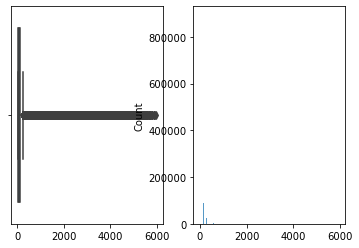

In [96]:
Data_JTD['Labor Value Number'].value_counts()
Data_JTD['Item Category'].value_counts()
Data_JTD['Target quantity UoM'].value_counts(dropna=False)
# sns.histplot(Data_JTD['Order Item'].tolist())
fig,(ax1,ax2) = plt.subplots(1,2)
sns.boxplot(Data_JTD['Order Item'].tolist(),ax=ax1)
sns.histplot(Data_JTD['Order Item'].tolist(),ax=ax2)

In [ ]:
Data_JTD.columns

In [ ]:
Data_JTD.drop(columns=["Unnamed: 0","Material","Labor Value Number","Order Item"],inplace=True)

In [97]:
Data_Finalinvoice.shape

(492314, 59)

In [10]:
Data_Finalinvoice.drop('Unnamed: 0',1,inplace=True)
Data_Finalinvoice

,Cust Type,Customer No.,Insurance Company,Invoice Date,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Technician Name,Total Amt Wtd Tax.,Total Value,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,City,State,Year,Month,Partner Type,Data Origin,Title
0,Retail,67849,NaN,2015-01-02,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.0,SPARK,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,RUPESH,4051.95,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53.000000000,thane,maharashtra,2014,12,1.0,Z007,2.0
1,Retail,67849,NaN,2014-08-14,136482,2014-08-08,15:26:53,45575,989.98,GENERAL MOTORS,0.0,SPARK,6249.87,Accidental,4230.25,400601,BC01,THANE,NO,0.0,AMARNATH,11470.10,11470.10,BC01FS1,2014-08-14 17:54:30,2014-08-08 15:26:53,6 days 02:27:37.000000000,thane,maharashtra,2014,8,1.0,Z007,2.0
2,Retail,67849,NaN,2014-08-16,135895,2014-08-06,12:49:48,45575,6473.05,GENERAL MOTORS,0.0,SPARK,7325.09,Paid Service,14546.14,400601,BC01,THANE,NO,0.0,RUPESH,28344.28,28344.28,BC01FS1,2014-08-16 10:52:30,2014-08-06 12:49:48,9 days 22:02:42.000000000,thane,maharashtra,2014,8,1.0,Z007,2.0
3,Retail,67849,NaN,2014-10-09,150383,2014-10-06,11:40:52,47556,0.00,GENERAL MOTORS,0.0,SPARK,0.00,Running Repairs,200.00,400601,BC01,THANE,NO,0.0,HARSHAD,200.00,200.00,BC01SA1,2014-10-09 17:35:30,2014-10-06 11:40:52,3 days 05:54:38.000000000,thane,maharashtra,2014,10,1.0,Z007,2.0
4,Retail,67849,NaN,2014-12-31,168210,2014-12-13,12:14:37,49317,1760.02,GENERAL MOTORS,500.0,SPARK,7850.09,Accidental,20348.81,400601,BC01,THANE,NO,0.0,Amarnath,30458.92,30458.92,BC01FS1,2014-12-31 18:41:00,2014-12-13 12:14:37,18 days 06:26:23.000000000,thane,maharashtra,2014,12,1.0,Z007,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357370,Retail,202421,NaN,2016-06-28,397688,2016-06-27,10:23:37,102464,3306.10,TOYOTA,0.0,INNOVA,0.00,Accidental,0.00,637006,X249,X249 - AMBUJA'S AUTOMOTIVES,NO,0.0,rajesh,3306.10,1562.66,X249SA1,2016-06-28 18:00:29,2016-06-27 10:23:37,1 days 07:36:52.000000000,namakkal,tamil nadu,2016,6,1.0,Z006,2.0
357371,Retail,204336,NaN,2016-06-30,400991,2016-06-30,18:22:24,71236,214.83,MARUTI SUZUKI,0.0,ALTO,0.00,Running Repairs,0.00,801101,X252,X252 - DINASARASWATI ENTERPRIE,NO,0.0,rajesh,214.83,1562.66,X252SA1,2016-06-30 18:38:23,2016-06-30 18:22:24,0 days 00:15:59.000000000,patna,bihar,2016,6,1.0,Z005,2.0
357372,Retail,199624,NaN,2016-06-27,393057,2016-06-19,17:43:28,23872,2070.11,MAHINDRA & MAHINDRA,0.0,SCORPIO NEF,0.00,Running Repairs,6048.17,410228,X297,X297 - WAI AUTO WORLD LLP,NO,0.0,rajesh,8118.28,1562.66,X297WM1,2016-06-27 14:51:30,2016-06-19 17:43:28,7 days 21:08:02.000000000,pune,maharashtra,2016,6,1.0,Z005,2.0
357373,Retail,192925,NaN,2016-06-27,381587,2016-05-31,17:27:14,21636,5418.19,MARUTI SUZUKI,0.0,ERTIGA,0.00,Accidental,0.00,0,X328,X328 - PRAMUKH AUTO,NO,0.0,rajesh,5418.19,1562.66,X328WM1,2016-06-27 10:45:25,2016-05-31 17:27:14,26 days 17:18:11.000000000,pune,maharashtra,2016,5,1.0,Z005,2.0


In [18]:
Data_Finalinvoice['Invoice_DateTime'] = pd.to_datetime(Data_Finalinvoice['Invoice_DateTime'])
Data_Finalinvoice['JobCard_DateTime'] = pd.to_datetime(Data_Finalinvoice['JobCard_DateTime'])
difference=Data_Finalinvoice['Invoice_DateTime']-Data_Finalinvoice['JobCard_DateTime']

In [23]:
difference[2].total_seconds()//(60*60*24)

9.0

In [11]:
Data_Finalinvoice['Cust Type'].value_counts()

Retail              357370
Corporate others         5
Name: Cust Type, dtype: int64

In [119]:
cleaned_invoice = pd.read_csv('cleaned_finalinvoice.csv')
cleaned_invoice.drop('Unnamed: 0',1,inplace=True)
cleaned_invoice

,Cust Type,Customer No.,Insurance Company,Invoice Date,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Technician Name,Total Amt Wtd Tax.,Total Value,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,City,State,Year,Month
0,Retail,67849,NaN,2015-01-02,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.00,SPARK,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,RUPESH,4051.95000,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53.000000000,thane,maharashtra,2014,12
1,Retail,84419,NaN,2015-01-03,173997,2015-01-02,14:12:18,78584,804.26,TATA MOTORS,197.03,INDICA,0.00,SMC Value Package,0.00,400603,BC01,THANE,NO,0.0,PRASHANT,1001.29000,1001.29,BC01SA2,2015-01-03 10:07:32,2015-01-02 14:12:18,0 days 19:55:14.000000000,thane,maharashtra,2015,1
2,Retail,81055,NaN,2015-01-03,173889,2015-01-02,11:40:44,33985,180.19,MARUTI SUZUKI,0.00,ZEN,0.00,Running Repairs,52.95,400607,BC01,THANE,NO,0.0,IMRAN,233.14000,233.14,BC01SA2,2015-01-03 11:12:57,2015-01-02 11:40:44,0 days 23:32:13.000000000,thane,maharashtra,2015,1
3,Retail,84419,NaN,2015-01-03,174158,2015-01-03,10:12:32,78584,0.00,TATA MOTORS,0.00,INDICA,0.00,SMC Redemption,0.00,400603,BC01,THANE,NO,0.0,PRASHANT,1674.22433,1644.70,BC01SA2,2015-01-03 11:40:44,2015-01-03 10:12:32,0 days 01:28:12.000000000,thane,maharashtra,2015,1
4,Retail,18980,NaN,2015-01-03,173860,2015-01-02,10:45:42,50057,1202.97,HYUNDAI,100.00,SANTRO XING,499.99,Paid Service,944.16,400603,BC01,THANE,NO,0.0,DAYANAND,2747.12000,2747.12,BC01SA2,2015-01-03 12:07:17,2015-01-02 10:45:42,1 days 01:21:35.000000000,thane,maharashtra,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477920,Retail,35648,NaN,2016-06-30,400915,2016-06-30,17:25:52,23457,554.74,MARUTI SUZUKI,0.00,WAGONR,0.00,Paid Service,0.00,395254,X279,X279 - J B CAR CARE,NO,0.0,rajesh,554.74000,1562.66,X279WM1,2016-06-30 17:29:24,2016-06-30 17:25:52,0 days 00:03:32.000000000,surat,gujarat,2016,6
477921,Retail,199624,NaN,2016-06-27,393057,2016-06-19,17:43:28,23872,2070.11,MAHINDRA & MAHINDRA,0.00,SCORPIO NEF,0.00,Running Repairs,6048.17,410228,X297,X297 - WAI AUTO WORLD LLP,NO,0.0,rajesh,8118.28000,1562.66,X297WM1,2016-06-27 14:51:30,2016-06-19 17:43:28,7 days 21:08:02.000000000,pune,maharashtra,2016,6
477922,Retail,192925,NaN,2016-06-27,381587,2016-05-31,17:27:14,21636,5418.19,MARUTI SUZUKI,0.00,ERTIGA,0.00,Accidental,0.00,0,X328,X328 - PRAMUKH AUTO,NO,0.0,rajesh,5418.19000,1562.66,X328WM1,2016-06-27 10:45:25,2016-05-31 17:27:14,26 days 17:18:11.000000000,pune,maharashtra,2016,5
477923,Retail,201760,NaN,2016-06-27,396647,2016-06-25,11:12:21,80901,942.17,HYUNDAI,0.00,I10,0.00,Accidental,4410.97,503161,X386,X386 - VINAYAKA MOTORS,NO,0.0,rajesh,5353.14000,1562.66,X386WM1,2016-06-27 11:46:40,2016-06-25 11:12:21,2 days 00:34:19.000000000,nizamabad,telangana,2016,6


In [120]:
merged_invoice = pd.merge(left=cleaned_invoice, right=Data_Customer, left_on='Customer No.', right_on='Customer No.')

In [125]:
merged_invoice

,Cust Type,Customer No.,Insurance Company,Invoice Date,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,Make,Misc Total,Model,OSL Total,Order Type,Parts Total,Pin code,Plant,Plant Name1,Print Status,Recovrbl Exp,Technician Name,Total Amt Wtd Tax.,Total Value,User ID,Invoice_DateTime,JobCard_DateTime,Service_Time,City,State,Year,Month,Partner Type,Data Origin,Title
0,Retail,67849,NaN,2015-01-02,168303,2014-12-13,14:29:43,49317,1203.14,GENERAL MOTORS,0.0,SPARK,500.06,Paid Service,2348.75,400601,BC01,THANE,NO,0.0,RUPESH,4051.95,4051.95,BC01FS1,2015-01-02 11:30:36,2014-12-13 14:29:43,19 days 21:00:53.000000000,thane,maharashtra,2014,12,1.0,Z007,2.0
1,Retail,67849,NaN,2014-08-14,136482,2014-08-08,15:26:53,45575,989.98,GENERAL MOTORS,0.0,SPARK,6249.87,Accidental,4230.25,400601,BC01,THANE,NO,0.0,AMARNATH,11470.10,11470.10,BC01FS1,2014-08-14 17:54:30,2014-08-08 15:26:53,6 days 02:27:37.000000000,thane,maharashtra,2014,8,1.0,Z007,2.0
2,Retail,67849,NaN,2014-08-16,135895,2014-08-06,12:49:48,45575,6473.05,GENERAL MOTORS,0.0,SPARK,7325.09,Paid Service,14546.14,400601,BC01,THANE,NO,0.0,RUPESH,28344.28,28344.28,BC01FS1,2014-08-16 10:52:30,2014-08-06 12:49:48,9 days 22:02:42.000000000,thane,maharashtra,2014,8,1.0,Z007,2.0
3,Retail,67849,NaN,2014-10-09,150383,2014-10-06,11:40:52,47556,0.00,GENERAL MOTORS,0.0,SPARK,0.00,Running Repairs,200.00,400601,BC01,THANE,NO,0.0,HARSHAD,200.00,200.00,BC01SA1,2014-10-09 17:35:30,2014-10-06 11:40:52,3 days 05:54:38.000000000,thane,maharashtra,2014,10,1.0,Z007,2.0
4,Retail,67849,NaN,2014-12-31,168210,2014-12-13,12:14:37,49317,1760.02,GENERAL MOTORS,500.0,SPARK,7850.09,Accidental,20348.81,400601,BC01,THANE,NO,0.0,Amarnath,30458.92,30458.92,BC01FS1,2014-12-31 18:41:00,2014-12-13 12:14:37,18 days 06:26:23.000000000,thane,maharashtra,2014,12,1.0,Z007,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357370,Retail,202421,NaN,2016-06-28,397688,2016-06-27,10:23:37,102464,3306.10,TOYOTA,0.0,INNOVA,0.00,Accidental,0.00,637006,X249,X249 - AMBUJA'S AUTOMOTIVES,NO,0.0,rajesh,3306.10,1562.66,X249SA1,2016-06-28 18:00:29,2016-06-27 10:23:37,1 days 07:36:52.000000000,namakkal,tamil nadu,2016,6,1.0,Z006,2.0
357371,Retail,204336,NaN,2016-06-30,400991,2016-06-30,18:22:24,71236,214.83,MARUTI SUZUKI,0.0,ALTO,0.00,Running Repairs,0.00,801101,X252,X252 - DINASARASWATI ENTERPRIE,NO,0.0,rajesh,214.83,1562.66,X252SA1,2016-06-30 18:38:23,2016-06-30 18:22:24,0 days 00:15:59.000000000,patna,bihar,2016,6,1.0,Z005,2.0
357372,Retail,199624,NaN,2016-06-27,393057,2016-06-19,17:43:28,23872,2070.11,MAHINDRA & MAHINDRA,0.0,SCORPIO NEF,0.00,Running Repairs,6048.17,410228,X297,X297 - WAI AUTO WORLD LLP,NO,0.0,rajesh,8118.28,1562.66,X297WM1,2016-06-27 14:51:30,2016-06-19 17:43:28,7 days 21:08:02.000000000,pune,maharashtra,2016,6,1.0,Z005,2.0
357373,Retail,192925,NaN,2016-06-27,381587,2016-05-31,17:27:14,21636,5418.19,MARUTI SUZUKI,0.0,ERTIGA,0.00,Accidental,0.00,0,X328,X328 - PRAMUKH AUTO,NO,0.0,rajesh,5418.19,1562.66,X328WM1,2016-06-27 10:45:25,2016-05-31 17:27:14,26 days 17:18:11.000000000,pune,maharashtra,2016,5,1.0,Z005,2.0


In [121]:
merged_invoice.isnull().sum()

Cust Type                  0
Customer No.               0
Insurance Company     337745
Invoice Date               0
Job Card No                0
JobCard Date               0
JobCard Time               0
KMs Reading                0
Labour Total               0
Make                       0
Misc Total                 0
Model                      0
OSL Total                  0
Order Type                 0
Parts Total                0
Pin code                   0
Plant                      0
Plant Name1                0
Print Status               0
Recovrbl Exp               0
Technician Name       169228
Total Amt Wtd Tax.         0
Total Value           150453
User ID                    0
Invoice_DateTime           0
JobCard_DateTime           0
Service_Time               0
City                       0
State                      0
Year                       0
Month                      0
Partner Type               0
Data Origin                0
Title                      0
dtype: int64

In [122]:
merged_invoice.shape

(357375, 34)

### Deriving total service time from invoice date time & job card date time 

In [ ]:
Data_Finalinvoice["Invoice_DateTime"]=Data_Finalinvoice["Invoice Date"]+' '+Data_Finalinvoice["Invoice Time"]
Data_Finalinvoice["JobCard_DateTime"]=Data_Finalinvoice["JobCard Date"]+' '+Data_Finalinvoice["JobCard Time"]
Data_Finalinvoice['JobCard_DateTime'] = pd.to_datetime(Data_Finalinvoice['JobCard_DateTime'],dayfirst=True)
Data_Finalinvoice['Invoice_DateTime'] = pd.to_datetime(Data_Finalinvoice['Invoice_DateTime'],dayfirst=True)
Data_Finalinvoice["Service_Time"]=Data_Finalinvoice["Invoice_DateTime"]-Data_Finalinvoice["JobCard_DateTime"]

In [ ]:
Data_Finalinvoice.columns

In [ ]:
Data_Finalinvoice.isnull().sum()

In [ ]:
Data_Finalinvoice["updated_CITY"]=nomi.query_postal_code(np.array(Data_Finalinvoice["Pin code"].astype(str))).county_name
Data_Finalinvoice["updated_District"]=nomi.query_postal_code(np.array(Data_Finalinvoice["Pin code"].astype(str))).state_name
Data_Finalinvoice["updated_Location_Area"]=nomi.query_postal_code(np.array(Data_Finalinvoice["Pin code"].astype(str))).place_name

In [ ]:
Data_Finalinvoice["CITY"] = Data_Finalinvoice["CITY"].str.lower()
Data_Finalinvoice["updated_CITY"] = Data_Finalinvoice["updated_CITY"].str.lower()

In [ ]:
Data_Finalinvoice["District"] = Data_Finalinvoice["District"].str.lower()
Data_Finalinvoice["updated_District"] = Data_Finalinvoice["updated_District"].str.lower()

In [ ]:
Data_Finalinvoice.head(2)

### nan value impute updated city

In [ ]:
o = Data_Finalinvoice[Data_Finalinvoice["updated_CITY"].isnull()]

In [ ]:
l = Data_Finalinvoice[Data_Finalinvoice["updated_CITY"].notnull()]

In [ ]:
x = list(o["CITY"].value_counts().keys())

In [ ]:
z = list(l["updated_CITY"].value_counts().keys())

In [ ]:
def common_mem(a, b):
    a_set = set(a)
    b_set = set(b)
  
    if (a_set & b_set):
        print(a_set & b_set)
    else:
        print("No common elements") 

In [ ]:
common_mem(x,z )

In [ ]:
xz = ['jharsuguda', 'nalgonda', 'ujjain', 'hassan', 'bhilwara', 'rajgarh', 'amravati', 'madurai', 'karur', 'jaipur', 'chittoor', 'villupuram', 'thrissur', 'hingoli', 'hamirpur', 'ajmer', 'patiala', 'varanasi', 'kurnool', 'jhansi', 'vijayapura', 'rupnagar', 'hyderabad', 'jammu', 'ernakulam', 'sheohar', 'nainital', 'kamrup', 'purnia', 'haridwar', 'warangal', 'koppal', 'vellore', 'sangrur', 'umaria', 'jalna', 'sidhi', 'nizamabad', 'una', 'samastipur', 'dindigul', 'kurukshetra', 'sirsa', 'ariyalur', 'vadodara', 'kota', 'churu', 'mohali', 'sangli', 'pondicherry', 'ranchi', 'gaya', 'jalpaiguri', 'kanchipuram', 'perambalur', 'kaithal', 'hoshiarpur', 'udaipur', 'jhajjar', 'prakasam', 'jalaun', 'jamui', 'meerut', 'etah', 'panchkula', 'kullu', 'ahmedabad', 'solan', 'aligarh', 'idukki', 'darbhanga', 'jalgaon', 'kolkata', 'dausa', 'cuddalore', 'bagalkot', 'ambala', 'mathura', 'raigarh', 'dhule', 'jalandhar', 'gadchiroli', 'bhadrak', 'pauri garhwal', 'ghaziabad', 'bidar', 'mysuru', 'nashik', 'mirzapur', 'ghazipur', 'seoni', 'raichur', 'dehradun', 'nagpur', 'mau', 'mumbai', 'coimbatore', 'bhiwani', 'nagapattinam', 'dahod', 'chandrapur', 'dhenkanal', 'tikamgarh', 'hisar', 'gwalior', 'dharwad', 'bathinda', 'panipat', 'nandurbar', 'anand', 'gorakhpur', 'khammam', 'satara', 'valsad', 'muktsar', 'begusarai', 'kozhikode', 'alappuzha', 'new delhi', 'pali', 'dhanbad', 'gurgaon', 'bharuch', 'tuticorin', 'navsari', 'chhindwara', 'chikkamagaluru', 'kolar', 'daman', 'muzaffarpur', 'buldhana', 'fatehabad', 'yamuna nagar', 'bhagalpur', 'davangere', 'malappuram', 'mahendragarh', 'mandi', 'medak', 'kanyakumari', 'wayanad', 'kodagu', 'pathanamthitta', 'mahesana', 'sonipat', 'theni', 'namakkal', 'ludhiana', 'sawai madhopur', 'barnala', 'patna', 'bengaluru', 'jind', 'farrukhabad', 'chennai', 'surat', 'patan', 'amritsar', 'ropar', 'nanded', 'sonbhadra', 'krishna', 'jaunpur', 'thane', 'chandigarh', 'gurdaspur', 'thanjavur', 'moga', 'sikar', 'ratnagiri', 'akola', 'virudhunagar', 'chitradurga', 'hathras', 'vidisha', 'kalaburagi', 'kasargod', 'fatehgarh sahib', 'betul', 'firozabad', 'latur', 'erode', 'adilabad', 'salem', 'rohtak', 'neemuch', 'udupi', 'solapur', 'mandya', 'parbhani', 'bulandshahr', 'bareilly', 'tiruvarur', 'kangra', 'kapurthala', 'krishnagiri', 'jabalpur', 'indore', 'munger', 'balaghat', 'rampur', 'dharmapuri', 'mainpuri', 'pune', 'ramgarh', 'kottayam', 'dholpur', 'cuttack', 'shimla', 'puri', 'bijnor', 'barmer', 'jhabua', 'guntur', 'lucknow', 'karauli', 'faridkot', 'aurangabad', 'sundergarh', 'agra', 'chittorgarh', 'jodhpur', 'ganganagar', 'rewari', 'beed', 'sitamarhi', 'washim', 'tirunelveli', 'gondia', 'mansa', 'faridabad', 'allahabad', 'pudukkottai', 'palakkad', 'osmanabad', 'bokaro', 'chandauli', 'dewas', 'ratlam', 'lakhisarai', 'raipur', 'nellore', 'moradabad', 'kolhapur', 'firozpur', 'karaikal', 'kannur', 'rajkot', 'karnal', 'wardha', 'kollam', 'panna', 'bhandara', 'bhopal', 'ramanathapuram', 'korba']

In [ ]:
d = []
for i in xz:
    j = o[o["CITY"] == i]
    d.append(i)

In [ ]:
for i in d:
    a = o[o.CITY==i].index
    print(i)
    for j in a:
        o.updated_CITY.loc[j] = i

In [ ]:
Data_Finalinvoice.columns

### impute nan value for updated district

In [ ]:
g = list(o["District"].value_counts().keys())

In [ ]:
h = list(l["updated_District"].value_counts().keys())

In [ ]:
def common_mem(a, b):
    a_set = set(a)
    b_set = set(b)
  
    if (a_set & b_set):
        print(a_set & b_set)
    else:
        print("No common elements") 

In [ ]:
common_mem(g,h)

In [ ]:
gh = ['rajasthan', 'maharashtra', 'tamil nadu', 'madhya pradesh', 'assam', 'kerala', 'west bengal', 'odisha', 'gujarat', 'arunachal pradesh', 'chandigarh', 'karnataka', 'jharkhand', 'bihar', 'uttarakhand', 'punjab', 'delhi', 'andhra pradesh', 'telangana', 'uttar pradesh', 'goa', 'himachal pradesh', 'haryana', 'lakshadweep']

In [ ]:
s = []
for i in gh:
    j = o[o["District"] == i]
    s.append(i)

In [ ]:
for i in s:
    a = o[o.District==i].index
    print(i)
    for j in a:
        o.updated_District.loc[j] = i

In [ ]:
o.shape

In [ ]:
o.isnull().sum()

In [ ]:
Data_Finalinvoice.drop(columns=["Unnamed: 0","Amt Rcvd From Custom","Amt Rcvd From Ins Co","CGST(14%)","CGST(2.5%)","CGST(6%)","CGST(9%)","Cash /Cashless Type","Claim No.","IGST(12%)","IGST(18%)","IGST(28%)","IGST(5%)","Expiry Date","Gate Pass Date","Gate Pass Time","SGST/UGST(14%)","SGST/UGST(2.5%)","SGST/UGST(6%)","SGST/UGST(9%)","Policy no.","Invoice Time","Invoice No","ODN No.","Outstanding Amt","Regn No","Service Advisor Name","TDS amount","Total IGST","Total GST","Total CGST","Total SGST/UGST","Area / Locality","CITY","District","updated_Location_Area"],inplace=True)

In [ ]:
o.drop(columns=["Unnamed: 0","Amt Rcvd From Custom","Amt Rcvd From Ins Co","CGST(14%)","CGST(2.5%)","CGST(6%)","CGST(9%)","Cash /Cashless Type","Claim No.","IGST(12%)","IGST(18%)","IGST(28%)","IGST(5%)","Expiry Date","Gate Pass Date","Gate Pass Time","SGST/UGST(14%)","SGST/UGST(2.5%)","SGST/UGST(6%)","SGST/UGST(9%)","Policy no.","Invoice Time","Invoice No","ODN No.","Outstanding Amt","Regn No","Service Advisor Name","TDS amount","Total IGST","Total GST","Total CGST","Total SGST/UGST","Area / Locality","CITY","District","updated_Location_Area"],inplace=True)

In [ ]:
o['Model'] = o['Model'].fillna(o['Model'].mode()[0])

In [ ]:
o["Total Value"].fillna((o["Total Value"].median()), inplace=True)

In [ ]:
o['Technician Name'] = o['Technician Name'].fillna(o['Technician Name'].mode()[0])

In [ ]:
o.notnull().sum()

In [ ]:
o.isnull().sum()

In [ ]:
l.notnull().sum()

In [ ]:
l.drop(columns=["Unnamed: 0","Amt Rcvd From Custom","Amt Rcvd From Ins Co","CGST(14%)","CGST(2.5%)","CGST(6%)","CGST(9%)","Cash /Cashless Type","Claim No.","IGST(12%)","IGST(18%)","IGST(28%)","IGST(5%)","Expiry Date","Gate Pass Date","Gate Pass Time","SGST/UGST(14%)","SGST/UGST(2.5%)","SGST/UGST(6%)","SGST/UGST(9%)","Policy no.","Invoice Time","Invoice No","ODN No.","Outstanding Amt","Regn No","Service Advisor Name","TDS amount","Total IGST","Total GST","Total CGST","Total SGST/UGST","Area / Locality","CITY","District","updated_Location_Area"],inplace=True)

In [ ]:
l['Model'] = l['Model'].fillna(l['Model'].mode()[0])

In [ ]:
l.isnull().sum()

### Cleaned o dataframe

In [ ]:
o.shape

In [ ]:
l.shape

In [ ]:
frames = [l,o]

In [ ]:
semi_cleaned_data =  pd.concat(frames)

In [ ]:
semi_cleaned_data.to_csv('semi_cleaned_Finalinvoice.csv')

In [ ]:
semi_cleaned_data.isnull().sum()

In [ ]:
Semi_cleaned_data = pd.read_csv("semi_cleaned_Finalinvoice.csv")

In [ ]:
copy_fi = Semi_cleaned_data.copy()

In [ ]:
copy_fi.head(5)

In [ ]:
copy_fi.columns

In [ ]:
copy_fi["Order Type"].value_counts()

In [ ]:
copy_fi.shape

### Dropping rows where order type is the paid service and total value is still 0.

In [ ]:
temp1 = copy_fi[(copy_fi["Order Type"] == "Paid Service") & (copy_fi["Total Value"] == 0) & (copy_fi["Insurance Company"].isnull())].index

In [ ]:
temp1

In [ ]:
copy_fi.drop(temp1 , inplace=True)

In [ ]:
copy_fi.shape

### Dropping rows where order type is Accidental , also where insurance is not been taken also total value is 0

In [ ]:
temp2 = copy_fi[(copy_fi["Order Type"] == "Accidental") & (copy_fi["Total Value"] == 0) & (copy_fi["Insurance Company"].isnull())].index

In [ ]:
copy_fi.drop(temp2 , inplace=True)

In [ ]:
copy_fi.shape

In [ ]:
copy_fi.groupby(["Order Type"])["Total Value"].count()

### Dropping rows where order type is Repeat Order , also where insurance is not been taken and where total value is still 0

In [ ]:
temp3 = copy_fi[(copy_fi["Order Type"] == "Repeat Order") & (copy_fi["Total Value"] == 0) & (copy_fi["Insurance Company"].isnull())].index

In [ ]:
copy_fi.drop(temp3,inplace=True)

### Replacing 0 from total value where order type is SMC Redemption with the median where total value is non zero

In [ ]:
copy_fi.loc[(copy_fi["Order Type"] == "SMC Redemption") & (copy_fi["Total Value"] == 0) & (copy_fi["Insurance Company"].isnull()),"Total Value"]= 1644.7

### Replacing 0 from total value where order type is Running Repairs with the median where total value is non zero

In [ ]:
copy_fi.loc[(copy_fi["Order Type"] == "Running Repairs") & (copy_fi["Total Value"] == 0) & (copy_fi["Insurance Company"].isnull()),"Total Value"]= 1644.7

In [ ]:
copy_fi["Order Type"].value_counts()

In [ ]:
copy_fi.head(2)

In [ ]:
copy_fi.isnull().sum()

### Dropping rows where Total Amt Wtd Tax is negative

In [ ]:
negative_values = copy_fi[(copy_fi["Total Amt Wtd Tax."] < 0)].index

In [ ]:
copy_fi.drop(negative_values , inplace=True)

In [ ]:
copy_fi.shape

### 0 value imputation for Total Amt Wtd Tax

### Dropping rows where order type is the paid service and Total Amt Wtd Tax is still 0.

In [ ]:
copy_fi.shape

In [ ]:
temp4 = copy_fi[(copy_fi["Order Type"] == "Paid Service") & (copy_fi["Total Amt Wtd Tax."] == 0) & (copy_fi["Insurance Company"].isnull())].index

In [ ]:
copy_fi.drop(temp4 , inplace=True)

In [ ]:
copy_fi.shape

### Dropping rows where order type is Accidental , also where insurance is not been taken also Total Amt Wtd Tax is 0

In [ ]:
temp5 = copy_fi[(copy_fi["Order Type"] == "Accidental") & (copy_fi["Total Amt Wtd Tax."] == 0) & (copy_fi["Insurance Company"].isnull())].index

In [ ]:
copy_fi.drop(temp5 , inplace=True)

In [ ]:
copy_fi.shape

### Dropping rows where order type is Repeat Order , also where insurance is not been taken and where Total Amt Wtd Tax is still 0

In [ ]:
temp6 = copy_fi[(copy_fi["Order Type"] == "Repeat Order") & (copy_fi["Total Amt Wtd Tax."] == 0) & (copy_fi["Insurance Company"].isnull())].index

In [ ]:
copy_fi.drop(temp6,inplace=True)

### Replacing 0 from Total Amt Wtd Tax where order type is SMC Redemption with the median where Total Amt Wtd Tax is non zero

In [ ]:
copy_fi.shape

In [ ]:
copy_fi.loc[(copy_fi["Order Type"] == "SMC Redemption") & (copy_fi["Total Amt Wtd Tax."] == 0) & (copy_fi["Insurance Company"].isnull()),"Total Amt Wtd Tax."]= 1674.22433

### Replacing 0 from Total Amt Wtd Tax where order type is Running Repairs with the mean where Total Amt Wtd Tax is non zero

In [ ]:
copy_fi.loc[(copy_fi["Order Type"] == "Running Repairs") & (copy_fi["Total Amt Wtd Tax."] == 0) & (copy_fi["Insurance Company"].isnull()),"Total Amt Wtd Tax."]= 2835.56

In [ ]:
copy_fi.shape

### Replacing 0 from Total Amt Wtd Tax where order type is Mechanical with the mean where Total Amt Wtd Tax is non zero

In [ ]:
d = copy_fi.loc[(copy_fi["Total Amt Wtd Tax."] != 0) & (copy_fi["Insurance Company"].isnull()) & (copy_fi["Order Type"] == "Mechanical")]

In [ ]:
d["Total Amt Wtd Tax."].mean()

In [ ]:
d["Total Amt Wtd Tax."].median()

In [ ]:
d["Total Amt Wtd Tax."].min()

In [ ]:
d["Total Amt Wtd Tax."].max()

In [ ]:
copy_fi.loc[(copy_fi["Order Type"] == "Mechanical") & (copy_fi["Total Amt Wtd Tax."] == 0) & (copy_fi["Insurance Company"].isnull()),"Total Amt Wtd Tax."]= 3461.95

In [ ]:
copy_fi.isnull().sum()

### Imputing nan values of updated district.

In [ ]:
copy_fi.loc[(copy_fi["Plant Name1"] == "VAPI") & (copy_fi["updated_District"].isnull()),"updated_District"]= "gujarat"

In [ ]:
copy_fi.head()

In [ ]:
copy_fi.loc[(copy_fi["Plant Name1"] == "X008- AAKASH AUTO (Puducherry)") & (copy_fi["updated_District"].isnull()),"updated_District"]= "pondicherry"

In [ ]:
copy_fi.isnull().sum()

In [ ]:
temp7 = copy_fi.loc[(copy_fi["updated_District"].isnull())].index

In [ ]:
copy_fi.drop(temp7 , inplace=True)

### impute nan values of updated city column

In [ ]:
copy_fi.loc[(copy_fi["Plant Name1"] == "YESHWANTPUR - BANGALORE") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "bengaluru"
copy_fi.loc[(copy_fi["Plant Name1"] == "NAGPUR") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "nagpur"
copy_fi.loc[(copy_fi["Plant Name1"] == "NASHIK") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "nashik"
copy_fi.loc[(copy_fi["Plant Name1"] == "HADAPSAR - PUNE") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "pune"
copy_fi.loc[(copy_fi["Plant Name1"] == "X062 - S N S MOTORS MYSORE") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "mysuru"
copy_fi.loc[(copy_fi["Plant Name1"] == "SAS NAGAR - MOHALI") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "mohali"
copy_fi.loc[(copy_fi["Plant Name1"] == "GREATER NOIDA") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "gautam buddha nagar"
copy_fi.loc[(copy_fi["Plant Name1"] == "PANCHKULLA") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "panchkula"
copy_fi.loc[(copy_fi["Plant Name1"] == "NERUL - NAVI MUMBAI") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "nerul - navi mumbai"
copy_fi.loc[(copy_fi["Plant Name1"] == "VAPI") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "valsad"
copy_fi.loc[(copy_fi["Plant Name1"] == "SURAT UDHANA") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "surat"
copy_fi.loc[(copy_fi["Plant Name1"] == "FARIDABAD 1") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "faridabad"
copy_fi.loc[(copy_fi["Plant Name1"] == "NELLORE") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "nellore"
copy_fi.loc[(copy_fi["Plant Name1"] == "MOHAN NAGAR - GAZIABAD") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "ghaziabad"
copy_fi.loc[(copy_fi["Plant Name1"] == "X017 - HEM KIRAN DIESELS") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "kolhapur"
copy_fi.loc[(copy_fi["Plant Name1"] == "X110 - KALYAN SERVICES") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "coimbatore"
copy_fi.loc[(copy_fi["Plant Name1"] == "X034 - SOHAMM MOTORS") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "aurangabad"
copy_fi.loc[(copy_fi["Plant Name1"] == "X012 - SR CAR CARE") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "cuddalore"
copy_fi.loc[(copy_fi["Plant Name1"] == "X023 - ROYAL KRR AUTOS") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "coimbatore"
copy_fi.loc[(copy_fi["Plant Name1"] == "X036 - X-PRESS MOTORS") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "madurai"
copy_fi.loc[(copy_fi["Plant Name1"] == "THANE") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "thane"
copy_fi.loc[(copy_fi["Plant Name1"] == "BELLANDUR - BANGALORE") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "bengaluru"
copy_fi.loc[(copy_fi["Plant Name1"] == "COIMBATORE") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "coimbatore"
copy_fi.loc[(copy_fi["Plant Name1"] == "X010 - LVM MOTORS") & (copy_fi["updated_CITY"].isnull()),"updated_CITY"]= "vellore"

In [ ]:
temp8 = copy_fi[(copy_fi["updated_CITY"].isnull())].index

In [ ]:
copy_fi.drop(temp8 , inplace=True)

In [ ]:
copy_fi.head()

In [ ]:
copy_fi.drop(columns=["Unnamed: 0"],inplace=True)

In [ ]:
copy_fi["year"] = pd.DatetimeIndex(copy_fi["JobCard_DateTime"]).year

In [ ]:
copy_fi["month"] = pd.DatetimeIndex(copy_fi["JobCard_DateTime"]).month

In [ ]:
copy_fi.rename(columns={"updated_District": "State", "updated_CITY": "City","year":"Year","month":"Month"},inplace=True)

In [ ]:
copy_fi.head(2)

In [ ]:
copy_fi.shape

In [ ]:
Data_Customer.columns

In [ ]:
copy_fi.isnull().sum()

In [ ]:
copy_fi.to_csv('cleaned_finalinvoice.csv')

### Number of plants in Maharashtra 

In [ ]:
import plotly.graph_objs as go

In [ ]:
px.histogram(MH_dist, x='Plant Name1').update_xaxes(categoryorder = "total descending")

### frequency of car models sold in maharashtra.

In [ ]:
px.histogram(MH_dist, x='Model').update_xaxes(categoryorder = "total descending")

### Frequency of usage of order types by customers as per plant in maharashtra

In [ ]:
px.histogram(MH_dist, x='Order Type').update_xaxes(categoryorder = "total descending")

### Frequency of cars sold by each makers in maharashtra

### Maruti suzuki

In [ ]:
Maruti_suzuki_MH = MH_dist[MH_dist["Make"] == "MARUTI SUZUKI"]

In [ ]:
px.histogram(Maruti_suzuki_MH, x='Model').update_xaxes(categoryorder = "total descending")

### Mahindra & Mahindra

In [ ]:
mahindra_MH = MH_dist[MH_dist["Make"] == "MAHINDRA &  MAHINDRA"]

In [ ]:
px.histogram(mahindra_MH, x='Model').update_xaxes(categoryorder = "total descending")

### HYUNDAI

In [ ]:
HYUNDAI_MH = MH_dist[MH_dist["Make"] == "HYUNDAI"]

In [ ]:
px.histogram(HYUNDAI_MH, x='Model').update_xaxes(categoryorder = "total descending")

### TATA MOTORS

In [ ]:
TATA_MOTORS_MH = MH_dist[MH_dist["Make"] == "TATA MOTORS"]

In [ ]:
px.histogram(TATA_MOTORS_MH, x='Model',y="").update_xaxes(categoryorder = "total descending")

### GENERAL MOTORS

In [ ]:
GENERAL_MOTORS_MH = MH_dist[MH_dist["Make"] == "GENERAL MOTORS"]

In [ ]:
px.histogram(GENERAL_MOTORS_MH, x='Model').update_xaxes(categoryorder = "total descending")

In [ ]:
len(list(copy_fi["Area / Locality"].value_counts().keys()))

In [ ]:
copy_fi["CITY"] = copy_fi["CITY"].str.lower()

In [ ]:
list(copy_fi["CITY"].value_counts().keys())

In [ ]:
MH_dist["Area / Locality"] = MH_dist["Area / Locality"].str.lower()

In [ ]:
list(MH_dist["Area / Locality"].value_counts().keys())

In [ ]:
copy_fi["Area / Locality"] = copy_fi["Area / Locality"].str.lower()

In [ ]:
list(copy_fi["Area / Locality"].value_counts().keys())

### X211 -  M/S KAMAL MOTORS

In [ ]:
X211_KAMAL_MOTORS = copy_fi[copy_fi["Plant Name1"] == "X211 -  M/S KAMAL MOTORS"]

In [ ]:
copy_fi["District"].value_counts()

In [ ]:
list(copy_fi["Plant Name1"].value_counts().keys())

In [ ]:
copy_fi["Model"].value_counts()

In [ ]:
copy_fi["Order Type"].value_counts()

In [ ]:
pd.pivot_table(copy_fi,index="Order Type",columns="Plant Name1")

In [ ]:
Running_repairs = copy_fi[copy_fi["Order Type"] == 'Running Repairs']

In [ ]:
Running_repairs["Total Value"].describe()

In [ ]:
fig = px.histogram(copy_fi, x="Total Value",nbins=100)
# fig.update_xaxes(range=[0,300000])
fig.show()

In [ ]:
pd.pivot_table(copy_fi,index="Plant Name1",columns="Order Type",values="Total Value")

### Histogram of the total value feature as we can see it is right skewed as some of the cars are overpriced in our dataset as compared to most of the cars.

In [ ]:
fig = px.histogram(Data_Finalinvoice, x="Total Value",nbins=100)
fig.update_xaxes(range=[0,300000])
fig.show()

In [ ]:
df = 

In [ ]:
fig = px.histogram(Data_Finalinvoice, x="Total Value",color="Make",nbins=100)
fig.show()

In [ ]:
Data_Finalinvoice["Total Value"].isnull().sum()